In [26]:
import psycopg2
from psycopg2 import connect, Error
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 
con = psycopg2.connect(
     database = 'postgres',
     user     = 'postgres',
     password = '123',
     host = 'localhost',
     port = '5432'
 )
cur = con.cursor()

In [27]:

cur.execute("SELECT * FROM covid LIMIT 1")
print(cur.fetchall())

[(1, datetime.datetime(2020, 1, 22, 0, 0), 'Anhui', 'Mainland China', datetime.datetime(2020, 1, 22, 17, 0), 1, 0, 0)]


In [28]:
data = pd.read_sql_query('SELECT * FROM covid;', con)
data.head()

C:\Users\juniper\AppData\Local\Temp\ipykernel_2008\1058013302.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('SELECT * FROM covid;', con)


,id,observationDate,state,country,lastUpdate,Confirmed,Recovered,Deaths
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0


In [48]:
df_rus=data.loc[data['country'].isin(['Russia'])]
df_rus=df_rus[['observationDate','state', 'Confirmed','Deaths','Recovered']]

df_rus

,observationDate,state,Confirmed,Deaths,Recovered
498,2020-01-31,Unknown,2,0,0
558,2020-02-01,Unknown,2,0,0
630,2020-02-02,Unknown,2,0,0
699,2020-02-03,Unknown,2,0,0
769,2020-02-04,Unknown,2,0,0
...,...,...,...,...,...
145971,2020-10-31,Smolensk Oblast,8804,236,6351
145978,2020-10-31,Stavropol Krai,21277,425,16400
145982,2020-10-31,Sverdlovsk Oblast,36212,772,28303
145986,2020-10-31,Tambov Oblast,9845,50,7808


In [5]:
df_rus1 = df_rus.loc[:10000, ['Confirmed', 'Recovered']]
df_rus1

,Confirmed,Recovered
498,2,0
558,2,0
630,2,0
699,2,0
769,2,0
842,2,0
915,2,0
990,2,0
1064,2,0
1138,2,0


In [6]:
df_rus_desc = df_rus.describe()

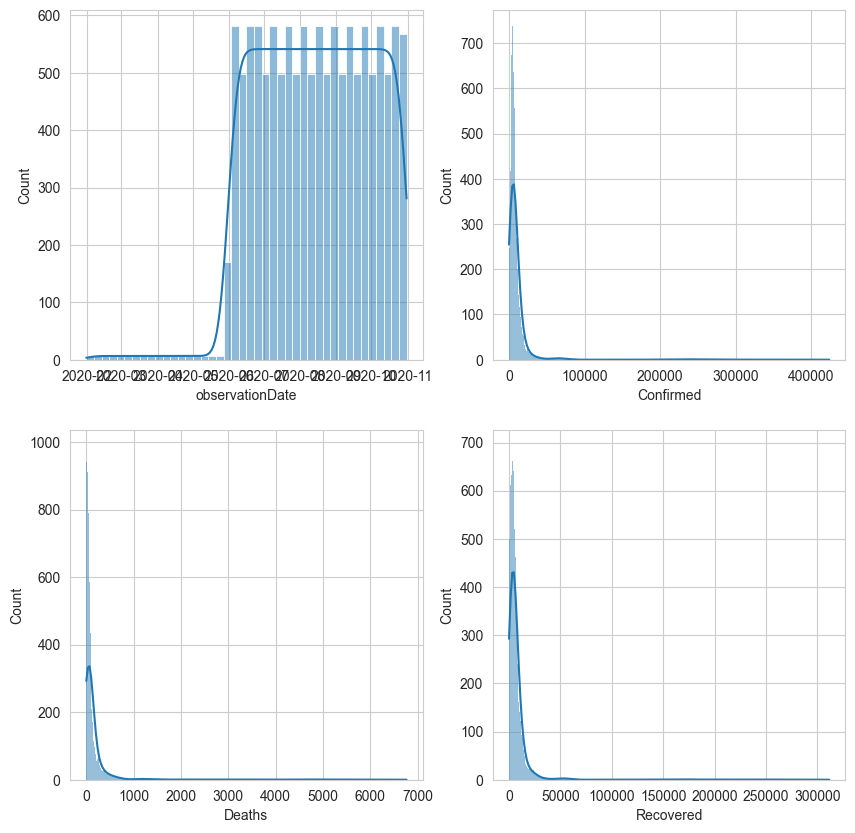

In [7]:
plt.figure(figsize=(10,10))
plt.tight_layout()
for i, col in enumerate(df_rus_desc.columns):
    bins = 'auto' if col != 'children' else df_rus[col].nunique()
    plt.subplot(2, 2, i+1)
    sns.histplot(df_rus[col], kde=True, bins=bins)
plt.show()

In [8]:
counts=df_rus.groupby ('observationDate').size()
counts = pd.DataFrame(counts, columns=['size'])
counts = counts[counts['size']>1]
counts

,size
observationDate,
2020-06-01,83
2020-06-02,83
2020-06-03,83
2020-06-04,83
2020-06-05,83
...,...
2020-10-27,83
2020-10-28,83
2020-10-29,83


In [25]:
df_rus_gr = df_rus.groupby('observationDate').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

df_rus_gr

,Confirmed,Deaths,Recovered
observationDate,,,
2020-01-31,2,0,0
2020-02-01,2,0,0
2020-02-02,2,0,0
2020-02-03,2,0,0
2020-02-04,2,0,0
...,...,...,...
2020-10-27,1537142,26409,1152848
2020-10-28,1553028,26752,1164915
2020-10-29,1570446,27111,1179465


In [11]:
df_rus_des = df_rus_gr.describe()
df_rus_des

,Confirmed,Deaths,Recovered
count,2.750000e+02,275.000000,2.750000e+02
mean,5.523048e+05,8943.410909,3.983884e+05
std,4.846548e+05,8563.974380,3.964060e+05
min,2.000000e+00,0.000000,0.000000e+00
25%,9.401500e+03,69.500000,6.390000e+02
50%,5.447250e+05,7274.000000,2.937800e+05
75%,9.566720e+05,16373.500000,7.701315e+05
max,1.588433e+06,27462.000000,1.193867e+06


<Axes: xlabel='observationDate'>

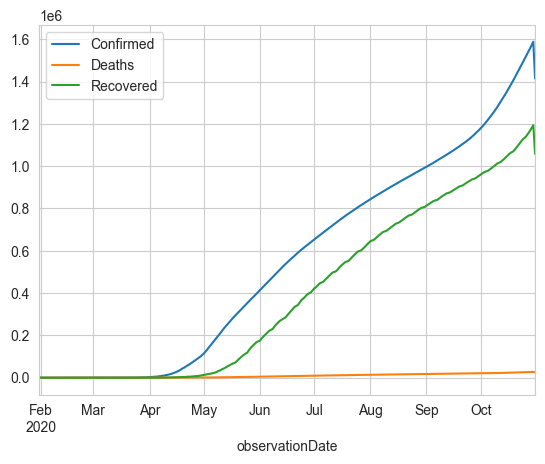

In [13]:

df_rus_gr.plot()

In [31]:
index_names = df_rus_gr[ df_rus_gr[' observationDate'] == 2020-10-31].index
#df_rus_gr.drop(index_names, inplace = True)

KeyError: ' observationDate'

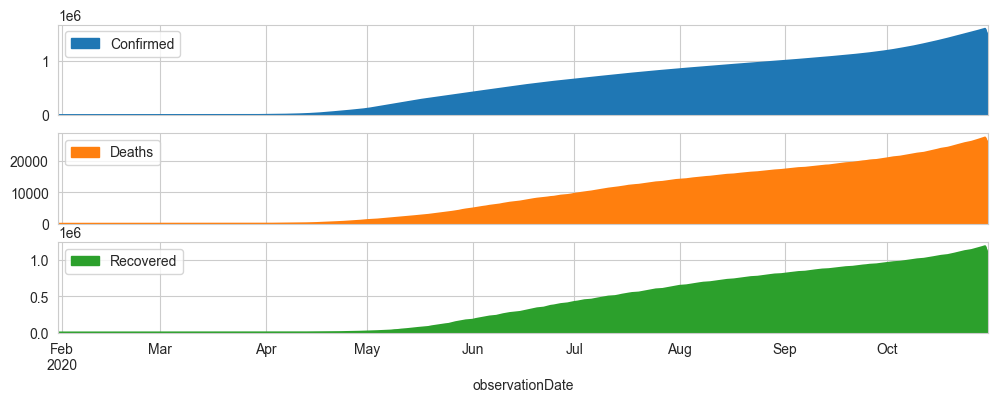

In [21]:
axs = df_rus_gr.plot.area(figsize=(12, 4), subplots=True)

In [39]:
df_rus_gr = df_rus_gr.assign(all_deaths=df_rus_gr.Deaths.cumsum())
df_rus_gr

,Confirmed,Deaths,Recovered,all_deaths
observationDate,,,,
2020-01-31,2,0,0,0
2020-02-01,2,0,0,0
2020-02-02,2,0,0,0
2020-02-03,2,0,0,0
2020-02-04,2,0,0,0
...,...,...,...,...
2020-10-27,1537142,26409,1152848,2353037
2020-10-28,1553028,26752,1164915,2379789
2020-10-29,1570446,27111,1179465,2406900


<Axes: xlabel='observationDate'>

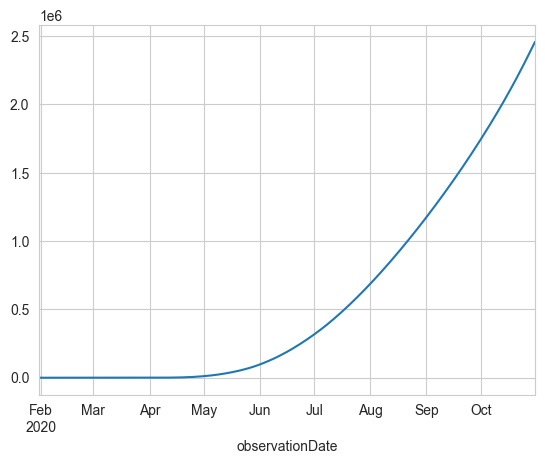

In [36]:
df_rus_gr['all_deaths'].plot()

In [46]:
df_rus_gr.describe()

,Confirmed,Deaths,Recovered,all_deaths
count,2.750000e+02,275.000000,2.750000e+02,2.750000e+02
mean,5.523048e+05,8943.410909,3.983884e+05,5.765887e+05
std,4.846548e+05,8563.974380,3.964060e+05,7.241511e+05
min,2.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,9.401500e+03,69.500000,6.390000e+02,4.360000e+02
50%,5.447250e+05,7274.000000,2.937800e+05,1.898280e+05
75%,9.566720e+05,16373.500000,7.701315e+05,1.032232e+06
max,1.588433e+06,27462.000000,1.193867e+06,2.459438e+06


In [38]:
df_rus_gr.mean()

Confirmed     552304.785455
Deaths          8943.410909
Recovered     398388.421818
all_deaths    576588.698182
dtype: float64

In [49]:
index_names = df_rus[ df_rus['state'] == 'Unknown'].index
df_rus.drop(index_names, inplace = True)

In [50]:
df_rus

,observationDate,state,Confirmed,Deaths,Recovered
33129,2020-06-01,Adygea Republic,874,9,394
33137,2020-06-01,Altai Krai,1915,12,805
33138,2020-06-01,Altai Republic,132,0,74
33143,2020-06-01,Amur Oblast,528,5,167
33159,2020-06-01,Arkhangelsk Oblast,2068,5,606
...,...,...,...,...,...
145971,2020-10-31,Smolensk Oblast,8804,236,6351
145978,2020-10-31,Stavropol Krai,21277,425,16400
145982,2020-10-31,Sverdlovsk Oblast,36212,772,28303
145986,2020-10-31,Tambov Oblast,9845,50,7808


In [51]:
df_rus.groupby('state').mean()

,observationDate,Confirmed,Deaths,Recovered
state,,,,
Adygea Republic,2020-08-16 00:00:00,3072.895425,24.294118,2462.601307
Altai Krai,2020-08-16 00:00:00,9843.352941,119.882353,8380.614379
Altai Republic,2020-08-16 00:00:00,2259.901961,6.313725,1654.562092
Amur Oblast,2020-08-16 00:00:00,3104.045752,38.366013,2474.869281
Arkhangelsk Oblast,2020-08-16 00:00:00,9964.921569,179.307190,7118.202614
...,...,...,...,...
Vologda Oblast,2020-08-15 12:00:00,3159.730263,32.328947,2482.493421
Voronezh Oblast,2020-08-15 12:00:00,12809.263158,113.394737,10743.861842
Yamalo-Nenets Autonomous Okrug,2020-08-15 12:00:00,11340.986842,74.144737,8829.256579


In [52]:
data

,id,observationDate,state,country,lastUpdate,Confirmed,Recovered,Deaths
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0
...,...,...,...,...,...,...,...,...
145989,145991,2020-10-31,Tasmania,Australia,2021-04-02 15:13:53,230,217,13
145990,145992,2020-10-31,Tatarstan Republic,Russia,2021-04-02 15:13:53,8417,7486,109
145991,145993,2020-10-31,Telangana,India,2021-04-02 15:13:53,240048,220466,1341
145992,145994,2022-02-11,Unknown,Kurwastan4,2021-01-22 11:00:00,1,0,0


In [57]:
data_gr = data.groupby('country').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
data_gr

,Confirmed,Deaths,Recovered
country,,,
Azerbaijan,1,0,0
"('St. Martin',)",2,0,0
Afghanistan,5655222,185833,3731789
Albania,1320787,37279,756464
Algeria,5624821,231326,3866360
...,...,...,...
West Bank and Gaza,3209647,24648,2289155
Yemen,255619,72067,136340
Zambia,1339531,30942,1192237


<Axes: xlabel='country'>

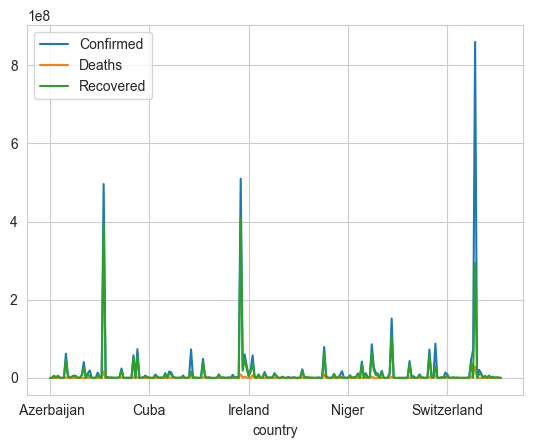

In [58]:
data_gr.plot()

In [61]:
index = data_gr[ data_gr['Confirmed'] < 9 ].index


In [63]:
data_gr.drop(index, inplace = True)

In [64]:
data_gr

,Confirmed,Deaths,Recovered
country,,,
Afghanistan,5655222,185833,3731789
Albania,1320787,37279,756464
Algeria,5624821,231326,3866360
Andorra,277800,10748,200217
Angola,430975,15496,166330
...,...,...,...
West Bank and Gaza,3209647,24648,2289155
Yemen,255619,72067,136340
Zambia,1339531,30942,1192237


In [65]:
index1 = data_gr[ data_gr['Deaths'] < 6 ].index
data_gr.drop(index1, inplace = True)
data_gr

,Confirmed,Deaths,Recovered
country,,,
Afghanistan,5655222,185833,3731789
Albania,1320787,37279,756464
Algeria,5624821,231326,3866360
Andorra,277800,10748,200217
Angola,430975,15496,166330
...,...,...,...
Vietnam,137683,2773,109205
West Bank and Gaza,3209647,24648,2289155
Yemen,255619,72067,136340


In [66]:
index2 = data_gr[ data_gr['Recovered'] < 17 ].index
data_gr.drop(index2, inplace = True)
data_gr

,Confirmed,Deaths,Recovered
country,,,
Afghanistan,5655222,185833,3731789
Albania,1320787,37279,756464
Algeria,5624821,231326,3866360
Andorra,277800,10748,200217
Angola,430975,15496,166330
...,...,...,...
Vietnam,137683,2773,109205
West Bank and Gaza,3209647,24648,2289155
Yemen,255619,72067,136340


<Axes: xlabel='country'>

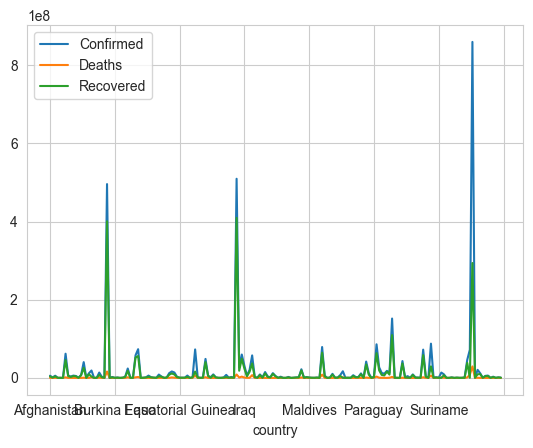

In [69]:

data_gr.plot()

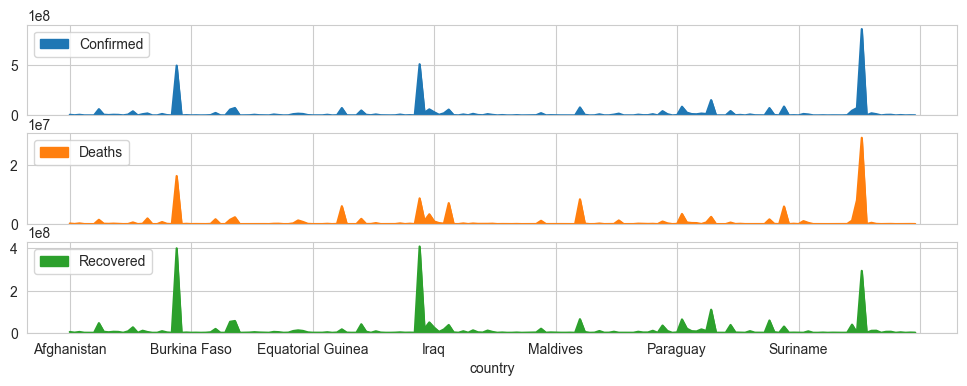

In [72]:
axs = data_gr.plot.area(figsize=(12, 4), subplots=True)

<Axes: ylabel='country'>

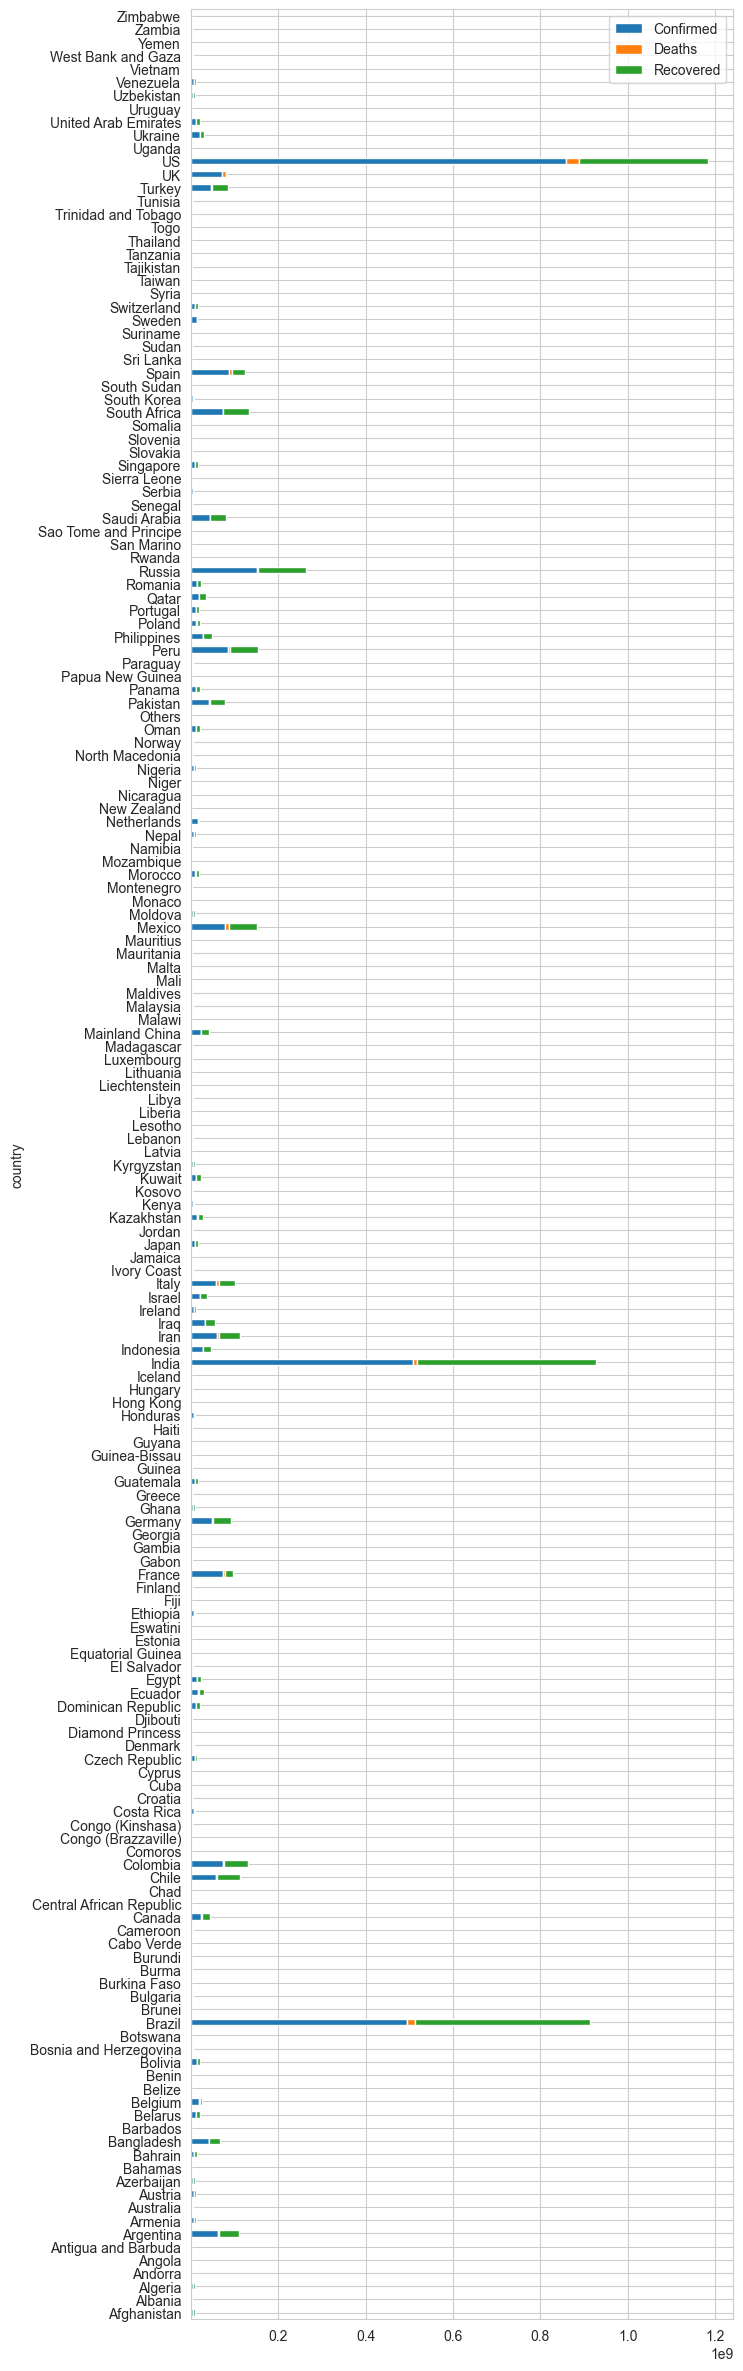

In [80]:
data_gr.plot.barh(figsize=(7, 30),stacked=True)

In [83]:
data_gr['th'] = data_gr['Confirmed'] + data_gr['Deaths'] + data_gr['Recovered']
index3 = data_gr[ data_gr['th'] < 100000000 ].index
data_gr.drop(index3, inplace = True)
data_gr.drop('th', axis=1, inplace=True)
data_gr

,Confirmed,Deaths,Recovered
country,,,
Argentina,61892303,1462103,45690809
Brazil,495679869,16381920,400663804
Chile,57755094,1463214,52109504
Colombia,73472635,2325449,55910392
India,509306206,8774583,409314205
Iran,59852532,3340088,49171335
Italy,57566017,7146874,37009551
Mexico,79004199,8451086,64499707
Peru,85949272,3448652,63330581


<Axes: xlabel='country'>

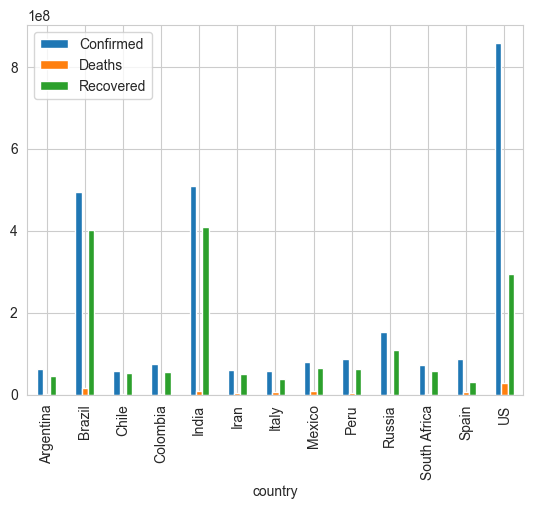

In [87]:
data_gr.plot.bar()

<Axes: xlabel='country'>

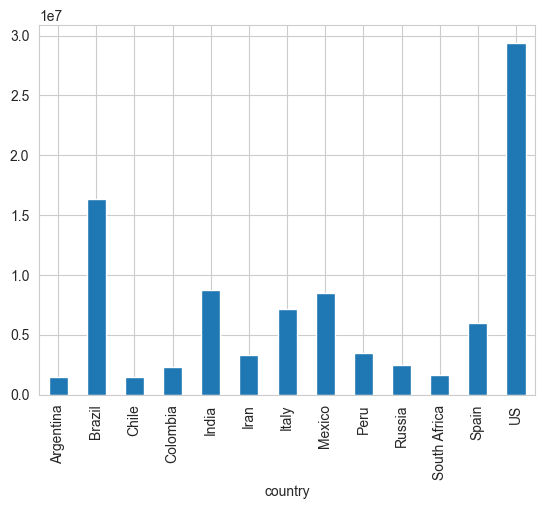

In [88]:
data_gr['Deaths'].plot.bar()

<Axes: xlabel='country'>

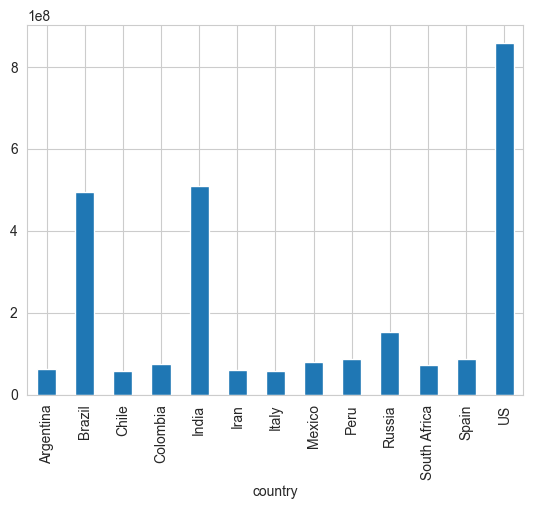

In [89]:
data_gr['Confirmed'].plot.bar()

In [ ]:
data_gr['deaths_con']=data_gr['Deaths']